In [11]:
from sklearn import datasets
import pandas as pd
import numpy as np
boston = datasets.load_boston()     # 返回一个类似于字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
from sklearn.pipeline import make_pipeline   # 引入管道简化学习流程
from sklearn.preprocessing import StandardScaler # 引入对数据进行标准化的类
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold# 引入K折交叉验证
import matplotlib.pyplot as plt
%matplotlib inline
scaler=StandardScaler()
std_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.30, random_state=0)#分出一部分数据假设为需要预测的数据
ls=LassoCV(alphas=np.logspace(-3, 2, 50),cv=KFold(10))#alphas自动选优参数，不用手动调参
ls.fit(X_train,y_train)
ls.score(X_train,y_train),ls.score(X_test,y_test)#看一下训练集和测试集得分情况

(0.7644670295722519, 0.6723776706759774)

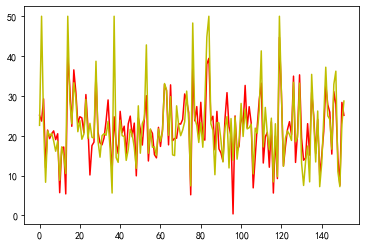

In [33]:
y_predict=ls.predict(X_test)
fig=plt.figure()
plt.plot(y_predict,color='r')
plt.plot(y_test,color='y')

In [34]:
from sklearn.linear_model import RidgeCV
rd=RidgeCV(alphas=np.logspace(-3, 2, 50),cv=KFold(10))
rd.fit(X_train,y_train)
rd.score(X_train,y_train),rd.score(X_test,y_test)#看一下训练集和测试集得分情况

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.7598775970390664, 0.6596703916674924)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.7645451026942549, 0.6733825506400195)

In [47]:
#PCA+线性回归=主成分回归
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
new_x=pca.fit_transform(std_X)
new_x

array([[-2.09829747,  0.77311275,  0.34294273, ..., -0.31533814,
         0.31864075,  0.2958318 ],
       [-1.45725167,  0.59198521, -0.69519931, ...,  0.26422321,
         0.55386126, -0.22366994],
       [-2.07459756,  0.5996394 ,  0.1671216 , ...,  0.44809462,
         0.48455996,  0.10516613],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, ...,  0.46794669,
         0.29411936, -0.63866037],
       [-0.27051907,  1.04136158, -0.58545406, ...,  0.48225947,
         0.27159707, -0.57934447],
       [-0.12580322,  0.76197805, -1.294882  , ...,  0.40147353,
         0.17530965, -0.13338197]])

In [49]:
pca.explained_variance_ratio_.sum()#累计解释率

0.9295378648139049

In [51]:

pca_lr=LinearRegression()
pca_lr.fit(pca.transform(X_train),y_train)
pca_lr.score(pca.transform(X_train),y_train),pca_lr.score(pca.transform(X_test),y_test),

(0.7352131651214835, 0.6204889109579121)